## Loading Data


In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import dataloading as dl

targetdir = "data/extracted/"

In [325]:
series = ['yy1', 'y1', 'x3915', 'x5729', 'x42001']

df = dl.SCF_load_data(targetdir, 2013, series)
df.head()

,household_id,imputed_hh_id,stock_mkt_value,total_income,weighting
0,1,11,0,20000,15504.012203
1,1,12,0,20000,15451.760975
2,1,13,0,20000,15470.501377
3,1,14,0,20000,15492.537583
4,1,15,0,20000,15523.350510


In [288]:
url = 'https://www.federalreserve.gov/econres/files/scf2019s.zip'

year = 2019
targetzip = targetdir + f'SCF{str(year)}_data_public.zip'


output = dl.URL_DL_ZIP(targetzip, targetdir, url)
output

TRY


['data/extracted/p19i6.dta']

In [13]:
# Add Implicate Number
df['implicate'] = [x - y*10 for x, y in zip(df['imputed_hh_id'], df['household_id'])]
# weighting dividing by 5 since data implicates being combined for regression
df['across_imp_weighting'] = [x/5 for x in df['weighting']]

In [9]:
df.head()

,household_id,imputed_hh_id,persons_in_PEU,total_income,weighting,implicate,across_imp_weighting
0,1,11,1,66000,30598.896539,1,6119.779308
1,1,12,1,56000,23561.874562,2,4712.374912
2,1,13,1,51000,25726.122276,3,5145.224455
3,1,14,1,41000,26488.317060,4,5297.663412
4,1,15,1,50000,23809.061856,5,4761.812371


In [304]:
targetzip = 'data/extracted/target.zip'
targetzip.rsplit('.', 1)[0]

'data/extracted/target'

<AxesSubplot:xlabel='total_income', ylabel='lqd_net_worth'>

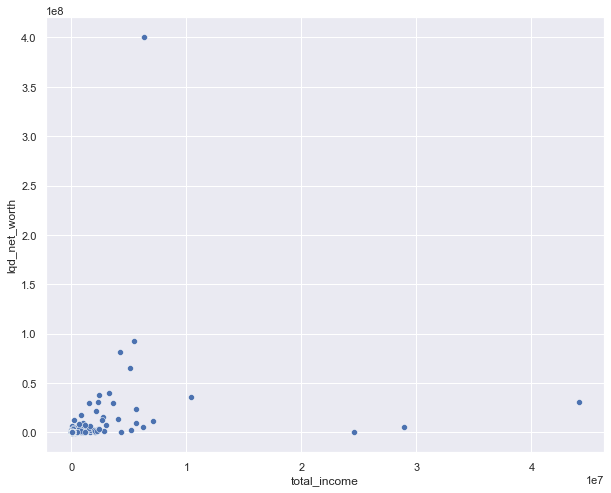

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,8))
sns.set_theme(style="darkgrid")

sns.scatterplot(
    data = df[df.implicate ==1], y="lqd_net_worth", x="total_income",
)

## IID Random Sampling

Consider how to do that with this dataset

## RII Regression

In [15]:
dl.RII(df,
       Xseries=['stock_mkt_value'],
       y='total_income')

/Users/danielvalenzuela/Documents/Flatiron/Repositories/SCF-Analysis/dataloading.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/danielvalenzuela/Documents/Flatiron/Repositories/SCF-Analysis/dataloading.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/danielvalenzuela/Documents/Flatiron/Repositories/SCF-Analysis/dataloading.py:314: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

{'intercept': {'p': 4.570426215897195e-07, 'coeff': 3713114049.571556},
 'stock_mkt_value': {'p': 4.250163896169821e-10, 'coeff': 637.5263211473217}}

In [5]:
output[1]

{1: array([[ 1.49539473e+18, -1.15347100e+08, -2.36050874e+14,
         -2.32883215e+14, -2.25872941e+14, -2.38229109e+14,
         -2.36898674e+14],
        [-1.15347100e+08,  2.41680649e+01, -1.85421872e+04,
         -9.22826200e+04, -1.94114891e+05, -3.64864281e+05,
         -4.31064981e+05],
        [-2.36050874e+14, -1.85421872e+04,  6.77843260e+10,
          3.69287559e+10,  3.59762515e+10,  3.81878827e+10,
          3.80784167e+10],
        [-2.32883215e+14, -9.22826200e+04,  3.69287559e+10,
          1.35127892e+11,  3.61413218e+10,  3.88491259e+10,
          3.89435592e+10],
        [-2.25872941e+14, -1.94114891e+05,  3.59762515e+10,
          3.61413218e+10,  8.94994121e+10,  3.93391305e+10,
          3.97169285e+10],
        [-2.38229109e+14, -3.64864281e+05,  3.81878827e+10,
          3.88491259e+10,  3.93391305e+10,  1.73654335e+11,
          4.48678851e+10],
        [-2.36898674e+14, -4.31064981e+05,  3.80784167e+10,
          3.89435592e+10,  3.97169285e+10,  4.48678851e

## Archiving and Logging

In [267]:
url = 'https://www.federalreserve.gov/econres/files/scf2016s.zip'

df = dl.archive(url = url,
          targetdir = targetdir)

df.index.max()



8

In [268]:
df

,URL,File,Directory,ArchiveURL,ArchiveTime,NewArchive
LogID,,,,,,
8,https://www.federalreserve.gov/econres/files/s...,scf2016s.zip,data/extracted/,https://web.archive.org/web/20201015210842/htt...,2020-10-25 16:48:44.458999,1
7,https://www.federalreserve.gov/econres/files/s...,scf2019s.zip,data/extracted/,https://web.archive.org/web/20201016175135/htt...,2020-10-16 17:51:35.000000,0


In [254]:
d = df.to_dict()

for key in d:
    print(key)
    for subkey in d[key]:
        print(subkey)
        print(type(d[key][subkey]))

URL
6
<class 'str'>
File
6
<class 'str'>
Directory
6
<class 'str'>
ArchiveURL
6
<class 'str'>
ArchiveTime
6
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
NewArchive
6
<class 'int'>


## Misc.

In [155]:
len(coeffs[i])

2

In [334]:
import numpy as np
from scipy import stats

coeffs = output[0]
m = 5
s = []
k = len(coeffs[1][0])

#  point estimates for each coeff 

for n in range(k):
    s.append([])


for i in range(m):
    i += 1
    for n in range(k):
        s[n].append(coeffs[i][0][n])
        
Qm_bar = []    
for n in range(k):
    
    ssum = sum(s[n]) / m
    Qm_bar.append(ssum)
    
Qm_bar = np.array([Qm_bar])    


    

# var-cov matrix of point estimates
summand_set = np.zeros((k, k))
for i in range(m):
    i+=1
    var = coeffs[i] - Qm_bar

    summand = var.T * var
    
    summand_set = summand_set + summand
    
Bm = summand_set / (m-1)


# avg of variance-cov matrices
summand_set = np.zeros((k,k))
var_matrices = output[1]

for i in range(m):
    i+=1
    summand = var_matrices[i]
    
    summand_set = summand_set + summand
    
Um_bar = summand_set/m


# total variance of regression coeff.
Tm = Um_bar + (1 + m**(-1))*Bm


# std dev of regression coeff.
Stddev = Tm**(1/2)

# t stats of regression coeff.
t_stats = Qm_bar/Stddev

    
# Relative increase in variance due to nonresponse
R_m =  ((1 + m**(-1))*Bm
      / Um_bar)

# Degrees of freedom
v = ((m-1)
     *(1+R_m**(-1))**(2))

p_values = []
for i in range(k):
    p_values.append(stats.t.sf(abs(t_stats[i][i]), df=v[i][i])*2) 
    
# P-values    
p_dict = {}
X_vars = ['intercept','ref_age','doctorate_deg', 'professional_deg', 'master_deg', 'college_deg', 'hs_deg']
for i in range(k):
    p_dict[X_vars[i]] = p_values[i] 
p_dict    

/Users/danielvalenzuela/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: invalid value encountered in sqrt


{'intercept': 0.8717230601486183,
 'ref_age': 0.9181024709445673,
 'doctorate_deg': 0.4866357558952238,
 'professional_deg': 0.4738679087567039,
 'master_deg': 0.04345336747626956,
 'college_deg': 0.30941217792710246,
 'hs_deg': 2.12423405303699e-08}

In [109]:
df.head()

,household_id,imputed_hh_id,weighting,persons_in_PEU,spouse_part_of_PEU,ref_next_relative_type,switch_of_resp_ref,ref_age,spouse_age,ref_sex,...,lqd_net_worth,educ_bins,doctorate_deg,professional_deg,master_deg,college_deg,hs_deg,implicate,across_imp_weighting,rel_weight
25,6,61,25234.875824,1,1,0,5,28,0,1,...,1001.0,3,0,0,1,0,0,1,5046.975165,0.000196
26,6,62,25293.184648,1,1,0,5,28,0,1,...,1001.0,3,0,0,1,0,0,2,5058.636930,0.000197
27,6,63,25252.538199,1,1,0,5,28,0,1,...,1001.0,3,0,0,1,0,0,3,5050.507640,0.000196
28,6,64,25249.482298,1,1,0,5,28,0,1,...,1001.0,3,0,0,1,0,0,4,5049.896460,0.000196
29,6,65,25292.695550,1,1,0,5,28,0,1,...,1001.0,3,0,0,1,0,0,5,5058.539110,0.000197


In [90]:
weights = ((df.weighting.sum())/5)

n = (df.shape[0]/5)

print(f'weights: {weights}')
print(f'n: {n}')
print(f'n: {weights*n}')

weights: 128642430.96482427
n: 5777.0
n: 743167323683.7898


In [104]:
list(df.keys())[3:-3]

['persons_in_PEU',
 'spouse_part_of_PEU',
 'ref_next_relative_type',
 'switch_of_resp_ref',
 'ref_age',
 'spouse_age',
 'ref_sex',
 'spouse_sex',
 'ref_race',
 'spouse_race',
 'ref_educ',
 'spouse_educ',
 'ref_UE_last_year',
 'ref_UE_last_year',
 'ref_industry_code',
 'spouse_industry_code',
 'ref_occ_code',
 'spouse_occ_code',
 'primary_home_type',
 'chance_staying_home',
 'ref_mom_living',
 'spouse_mom_living',
 'ref_mom_educ',
 'spouse_mom_educ',
 'ref_mom_age',
 'spouse_mom_age',
 'ref_dad_living',
 'spouse_dad_living',
 'ref_dad_educ',
 'spouse_dad_educ',
 'ref_dad_age',
 'spouse_dad_age',
 '2018_total_income',
 'income_comparison',
 'inheritances',
 'mutual_funds_value',
 'bonds_mkt_value',
 'stock_mkt_value',
 'annuity_cash_value',
 'trusts_cash_value',
 'life_ins_cash_value',
 'total_cc_limit',
 'freq_cc_payment',
 'rev_charge_accts',
 'LOC_owed_now',
 'ed_loans_owed_now',
 'cc_newcharges_value',
 'cc_currbal_value',
 'checking_accts_value',
 'savings_accts_value',
 'lqd_assets

In [77]:
# financially independent between 21 and 35
query = (df['ref_age'] <= 35) & (df['persons_in_PEU'] == 1) & (df['ref_age'] >= 21)

len(df[query].household_id.unique())
df[query].implicate.value_counts()

5    325
4    325
3    325
2    325
1    325
Name: implicate, dtype: int64

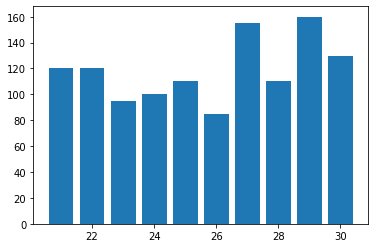

1    1185
Name: x7001, dtype: int64

In [21]:
import matplotlib.pyplot as plt

#financially independent between 21 and 30

query = (df['x8022'] <= 30) & (df['x7001'] == 1) & (df['x8022'] >= 21)
x = df[query].x8022.value_counts().index
y = df[query].x8022.value_counts().values

plt.bar(x=x,
       height=y)

plt.show()

## number of people in PEUs


In [23]:
df = dl.clean_df(df)
df.sample(5)

1


,j7398,j7578,j7579,j7019,j7020,j7001,j7050,j8020,j8021,j5908,...,j33001,x306,x11272,x11572,LOC_owed_now,ed_loans_owed_now,cc_newcharges_value,cc_currbal_value,checking_accts_value,savings_accts_value
6686,0,0,0,8,8,0,0,0,0,0,...,0,NaN,NaN,NaN,0,1500,0,0,1000,0
12030,0,0,0,8,8,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,0,0,250,0
1342,0,0,0,8,8,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,200,5500,300,0
14146,0,0,0,8,8,0,0,0,0,0,...,0,NaN,NaN,NaN,0,112000,4000,-2,2500,0
9226,0,0,0,8,8,0,0,0,0,0,...,0,NaN,NaN,NaN,0,0,180,-1,600,0


KeyError: "None of [Index(['yy1', 'y1', 'x42001', 'x7001', 'x7020', 'x102', 'x8000', 'x14', 'x19',\n       'x8021', 'x103', 'x6809', 'x6810', 'x5931', 'x6111', 'x6780', 'x6784',\n       'x7402', 'x7412', 'x7401', 'x7411', 'x501', 'x7136', 'x6026', 'x6120',\n       'x6032', 'x6132', 'x6027', 'x6121', 'x6028', 'x6122', 'x6033', 'x6133',\n       'x6029', 'x6123', 'x5729', 'x7650', 'x5802', 'x6704', 'x6706', 'x3915',\n       'x6576', 'x6587', 'x4006', 'x414', 'x432', 'x7575'],\n      dtype='object')] are in the [columns]"

In [11]:
"""XX1             Internal case ID (8-digit) -- identical for
                all imputation replicates ("implicates")
                
                NOTE: includes IDs of cases not released to the field (list
                sample replicate cases and postcard refusals)
                *********************************************************
                    NOT INCLUDED IN THE PUBLIC DATA SET
                *********************************************************


X1              Internal ID/replicate number -- XX1*10 + imputation replicate
                number (1-5)
                *********************************************************
                    NOT INCLUDED IN THE PUBLIC DATA SET
                *********************************************************

YY1             Case ID for external users

                     0.     Inap. (not a completed interview)

Y1              Equivalent for X1 for external users

                     0.     Inap. (not a completed interview)
                     
Regional data not included in public dataset 

"""

"""EDUCATION
 1.    *1st, 2nd, 3rd, or 4th grade
                     2.    *5th or 6th grade
                     3.    *7th and 8th grade
                     4.    *9th grade
                     5.    *10th grade
                     6.    *11th grade
                     7.    *12th grade, no diploma
                     8.    *High school graduate - high school diploma or equivalent
                     9.    *Some college but no degree
                    10.    *Associate degree in college - occupation/vocation program
                    11.    *Associate degree in college - academic program
                    12.    *Bachelor's degree (for example: BA, AB, BS)
                    13.    *Master's degree ( for exmaple: MA, MS, MENG, MED, MSW, MBA)
                    14.    *Professional school degree (for example: MD, DDS, DVM, LLB, JD)
                    15.    *Doctorate degree (for example: PHD, EDD)
                    -1.    *Less than 1st grade
                     0.     Inap. (no spouse/partner;)
                *********************************************************
                    FOR THE PUBLIC DATA SET, CODES 2, 3, 4, 5, 6, AND 7
                    ARE COMBINED WITH CODE 1; CODE 10 AND CODE 11 ARE
                    COMBINED WITH CODE 9, AND; CODES 13, 14, AND 15 ARE
                    COMBINED WITH CODE 12
                *********************************************************

"""
rename_dict = {'yy1': 'household_id',
               'y1': 'imputed_hh_id',
               'x42001': 'weighting',
               'x7001': 'persons_in_PEU',
               'x7020': 'spouse_part_of_PEU', ## 1 is not in PEU, 2 is in
               'x102': 'ref_next_relative_type', ## 2 and 3 are spouses/partners, 1 is the respondent 
               'x8000': 'switch_of_resp_ref',
               'x14': 'ref_age',
               'x19': 'spouse_age',
               'x8021': 'ref_sex',
               'x103': 'spouse_sex',
               'x6809': 'ref_race',
               'x6810': 'spouse_race',
               'x5931': 'ref_educ', ## doctorate and profession combined as code 14
               'x6111': 'spouse_educ',
               'x6780': 'ref_UE_last_year', # UE or looking for work in last year
               'x6784': 'ref_UE_last_year',
               'x7402': 'ref_industry_code', # 1 is agr, 2 energy/construction, 3 food, 4 trade/retail, 5 prof. services, 6 consumer services/goods, 7 public admin
               'x7412': 'spouse_industry_code',
               'x7401': 'ref_occ_code', # 1 is white-collar/services, 2 is front-line clerks/sales, 3 public institutions/entertainemnt front-line, 4 artisans, 5 industrial workers, 6 industrial managers
               'x7411': 'spouse_occ_code',
               'x501': 'primary_home_type', # 2 is mobile home, 2 is house/apt, 3 ranch, 5 farm
               'x7136': 'chance_staying_home', # 0 - 100
                   'x6026': 'ref_mom_living',
                   'x6120': 'spouse_mom_living',
                   'x6032': 'ref_mom_educ',
                   'x6132': 'spouse_mom_educ',
                   'x6027': 'ref_mom_age', ## FOR THE PUBLIC DATA SET, PARENTS' AGES ROUNDED TO NEAREST AND TOP-CODED AT 95
                   'x6121': 'spouse_mom_age',
                   'x6028': 'ref_dad_living',
                   'x6122': 'spouse_dad_living',
                   'x6033': 'ref_dad_educ',
                   'x6133': 'spouse_dad_educ',
                   'x6029': 'ref_dad_age',
                   'x6123': 'spouse_dad_age',
              'x5729': '2018_total_income',
              'x7650': 'income_comparison', # 1 is high, 2 is low, 3 is normal compared to normal year
              'x5802': 'inheritances',
              'x6704': 'mutual_funds_value',
              'x6706': 'bonds_mkt_value',
              'x3915': 'stock_mkt_value',
              'x6576': 'annuity_cash_value',
              'x6587': 'trusts_cash_value',
              'x4006': 'life_ins_cash_value',
              'x414': 'total_cc_limit',
              'x432': 'freq_cc_payment',
              'x7575': 'rev_charge_accts'}

df.rename(columns=rename_dict, inplace=True)
df.head()

,j7398,j7578,j7579,j7019,j7020,j7001,j7050,j8020,j8021,j5908,...,j6768,x42000,weighting,j306,j11272,j11572,j33001,x306,x11272,x11572
0,0,0,0,8,8,0,0,0,0,0,...,1,30609.361546,30598.896539,NaN,NaN,NaN,0,NaN,NaN,NaN
1,0,0,0,8,8,0,0,0,0,0,...,1,23575.752202,23561.874562,NaN,NaN,NaN,0,NaN,NaN,NaN
2,0,0,0,8,8,0,0,0,0,0,...,1,25762.246741,25726.122276,NaN,NaN,NaN,0,NaN,NaN,NaN
3,0,0,0,8,8,0,0,0,0,0,...,1,26511.942367,26488.317060,NaN,NaN,NaN,0,NaN,NaN,NaN
4,0,0,0,8,8,0,0,0,0,0,...,1,23825.934782,23809.061856,NaN,NaN,NaN,0,NaN,NaN,NaN


In [17]:


## Lines of credit
LOC_owed_list = ['x1108',
                 'x1119',
                 'x1130',
                 'x1136'
                ]

df['LOC_owed_now'] = (df['x1108']
                    + df['x1119']
                    + df['x1130']
                    + df['x1136']
                   )

## Education loans
educ_loans_owed_list = ['x7824',
                        'x7847',
                        'x7870',
                        'x7924',
                        'x7947',
                        'x7970',
                        'x7179'
                       ]

df['ed_loans_owed_now'] = (df['x7824']
                           + df['x7847']
                           + df['x7870']
                           + df['x7924']
                           + df['x7947']
                           + df['x7970']
                           + df['x7179']
                          )



## Relatives living in HH
"""
                     1.    *RESPONDENT
                     2.    *SPOUSE; Spouse of R
                     3.    *PARTNER; Partner of R
                     4.    *CHILD (in-law) (of R or Spouse/Partner)
                     5.    *GRANDCHILD
                     6.    *PARENT
                     7.    *GRANDPARENT
                     8.    *AUNT/UNCLE
                     9.    *COUSIN
                    10.    *NIECE/NEPHEW
                    11.    *SISTER/BROTHER
                    12.    *GREAT GRANDCHILD
                    29.    *OTHER RELATIVE
                    31.    *ROOMMATE
                    32.    *FRIEND
                    34.    *BOARDER OR ROOMER/LODGER
                    35.    *PAID HELP; maid, etc.
                    36.    *FOSTER CHILD
                    39.    *OTHER UNRELATED PERSON
                     0.     Inap. (no further persons)
                *********************************************************
                    FOR THE PUBLIC DATA SET, CODE 12 IS COMBINED WITH
                    CODE 5; CODES 31, 32, AND 36 ARE COMBINED WITH CODE
                    39; CODES 9 AND 10 ARE COMBINED WITH CODE 29
                *********************************************************
"""

person_types_in_HH = ['x8020', 
                      'x102',
                      'x108',
                      'x114',
                      'x120',
                      'x126',
                      'x132',
                      'x202',
                      'x208',
                      'x214',
                      'x220',
                      'x226'
                     ]

## CREDIT cards
cc_newcharges_list = ['x412',
                 'x420',
                 'x426'
                ]

df['cc_newcharges_value'] = (df['x412']
                     + df['x420']
                     + df['x426']
                    )

cc_currbal_list = ['x413',
                 'x421',
                 'x427'
                ]

df['cc_currbal_value'] = (df['x413']
                     + df['x421']
                     + df['x427']
                    )

## CHECKING Nos. 1-6 have detailed data, 7 is remaining accounts

checking_accts_list = ['x3506',
                       'x3510',
                       'x3514',
                       'x3518',
                       'x3522',
                       'x3526',
                       'x3529'
                      ]

df['checking_accts_value'] = (df['x3506']
                              + df['x3510']
                              + df['x3514']
                              + df['x3518']
                             + df['x3522']
                             + df['x3526']
                             + df['x3529']
                             )

## SAVINGS accts

"""

                     1.    *TRADITIONAL SAVINGS ACCOUNT; "passbook account";
                            "statement account"
                     2.    *COVERDELL/EDUCATION IRA
                     3.    *529/STATE-SPONSORED EDUCATION ACCOUNT
                     4.    *MONEY MARKET ACCOUNT
                     5.     Christmas club account; other account for
                            designated saving purpose (e.g., vacation)
                     6.     Share account
                     7.    *HEALTH SAVINGS ACCOUNT; medical savings account
                    12.    *OTHER FLOATING-RATE SAVINGS ACCOUNT
                            (other than those coded 4)
                    14.     Informal group saving arrangement
                    20.     Foreign account type
                    30.    *SWEEP ACCOUNT n.e.c.; cash management account
                    -7.    *OTHER
                     0.     Inap. (no savings accounts: X3727^=1/fewer than 2
                            accounts: X3728<2/fewer than 3 account: X3728<3/
                            fewer than 4 accounts: X3728<4/fewer than 5
                            accounts: X3728<5/fewer than 6 accounts)
                *********************************************************
                    FOR THE PUBLIC DATA SET, CODES 6, 14, AND 20 ARE
                    COMBINED WITH CODE 1; CODES 3 AND 7 ARE COMBINED
                    WITH CODE 2; CODE 30 IS COMBINED WITH CODE 12
                *********************************************************
"""
## Nos. 1-6 have detailed data, 7 is remaining accounts
savings_accts_list = ['x3730',
                      'x3736',
                      'x3742',
                      'x3748',
                      'x3754',
                      'x3760',
                      'x3765'
                     ]

savings_accts_types = [df['x3732'],
                          df['x3738'],
                          df['x3744'],
                          df['x3750'],
                          df['x3756'],
                          df['x3762']
                      ]

savings_accts_incl_codes = [1, 4, 12]

# inlcuding only unincumbered savings
for i in savings_accts_list:
    for n in savings_accts_types:
        df[i] = [(y if x in savings_accts_incl_codes 
                  else 0) 
                 for x, y in zip(n, df[i])]

df['savings_accts_value'] = (df['x3730']
                              + df['x3736']
                              + df['x3742']
                              + df['x3748']
                             + df['x3754']
                             + df['x3760']
                             + df['x3765']
                            )
                      

In [22]:












# query = (df['x3730'] == 2)

# for i in savings_accts_types:
#     query = (i == 2)
#     for n in savings_accts_list:
#         print(df[query][n].value_counts() )




0    836
Name: x3730, dtype: int64
0    836
Name: x3736, dtype: int64
0    836
Name: x3742, dtype: int64
0    836
Name: x3748, dtype: int64
0    836
Name: x3754, dtype: int64
0    836
Name: x3760, dtype: int64
0    836
Name: x3765, dtype: int64
0    949
Name: x3730, dtype: int64
0    949
Name: x3736, dtype: int64
0    949
Name: x3742, dtype: int64
0    949
Name: x3748, dtype: int64
0    949
Name: x3754, dtype: int64
0    949
Name: x3760, dtype: int64
0    949
Name: x3765, dtype: int64
0    619
Name: x3730, dtype: int64
0    619
Name: x3736, dtype: int64
0    619
Name: x3742, dtype: int64
0    619
Name: x3748, dtype: int64
0    619
Name: x3754, dtype: int64
0    619
Name: x3760, dtype: int64
0    619
Name: x3765, dtype: int64
0    305
Name: x3730, dtype: int64
0    305
Name: x3736, dtype: int64
0    305
Name: x3742, dtype: int64
0    305
Name: x3748, dtype: int64
0    305
Name: x3754, dtype: int64
0    305
Name: x3760, dtype: int64
0    305
Name: x3765, dtype: int64
0    192
Name: x3730

In [ ]:



X = df[['cast_total_facebook_likes','budget']]
y = df['gross']

# Run the train-test split function.
X_train, X_test, y_train, y_test = train_test_split(X, y,               # Pass in our X and y
                                                    random_state=42,    # Abritary select a random_state 
                                                    test_size=.2        # Split test size to be 20% of full data.
                                                   )
# Instantiate the Standar Scaler Object.
ss = StandardScaler()

# Fit and Transform the training data.
X_train_transformed = ss.fit_transform(X_train)

# ONLY TRANSFORM the test data.
X_test_transformed = ss.transform(X_test)

# Instantiate the Linear Regression Object.
model = LinearRegression()

# Fit the model to the transformed X_train, and the y_train.
model.fit(X_train_transformed, y_train)
print(model.score(X_train_transformed, y_train))

# Score the model based on the transformed X_test and the y_test.
print(model.score(X_test_transformed, y_test))